In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder
from  sklearn.preprocessing import OneHotEncoder
import scipy 
from scipy.sparse import coo_matrix, hstack

from __future__ import division
from scipy.special import erfinv

In [5]:
df_train = pd.read_csv("../data/new_train_full.csv").fillna(0.0)
df_test = pd.read_csv("../data/new_test_full.csv").fillna(0.0)

In [6]:
df_train = df_train.drop( ["TARGET"] , axis = 1 ) 
test_ids = df_test["SK_ID_CURR"].values
#df_test = df_test.drop( ["SK_ID_CURR"] , axis = 1 ) 

In [7]:
cols = [x for x  in list(df_train.columns) if "SK" in x ]
df_train = df_train.drop( cols , axis = 1 )
df_test = df_test.drop( cols , axis = 1 )
print( df_train.shape )
print(df_test.shape)

(307511, 714)
(48744, 714)


In [8]:
df_labels = pd.read_csv("../data/labels_train.csv" , header = None )

In [9]:
labels_train = df_labels[1].values

In [10]:
features_train_num = df_train.select_dtypes(include=[np.number])
features_test_num = df_test.select_dtypes(include=[np.number])
features_train_cat =df_train.select_dtypes(include=[object])
features_test_cat = df_test.select_dtypes(include=[object])

In [11]:
cats_not_doc = [ x for x in features_train_num.columns if not x.startswith("FLAG_DOCUMENT")]
features_train_num = features_train_num[ cats_not_doc ]
features_test_num = features_test_num[ cats_not_doc ]

In [12]:
not_flags = [ x for x in features_train_num.columns if  not x.startswith("FLAG")]
flags = [ x for x in features_train_num.columns if x.startswith("FLAG")]

new_cats_train = features_train_num[ flags ]
new_cats_test = features_test_num[ flags ]

features_train_num = features_train_num.drop( flags , axis = 1 )
features_test_num = features_test_num.drop( flags , axis = 1 )

features_train_cat = pd.concat( [features_train_cat  , new_cats_train ]  , axis = 1 )
features_test_cat = pd.concat( [features_test_cat , new_cats_test] , axis = 1  )


features_train_num.head()


,LIVINGAPARTMENTS_MODE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,COMMONAREA_AVG,OBS_60_CNT_SOCIAL_CIRCLE,LIVINGAREA_MODE,ENTRANCES_AVG,LIVINGAREA_MEDI,ENTRANCES_MEDI,...,MAX(prev.MAX(card.AMT_DRAWINGS_ATM_CURRENT)),STD(prev.MAX(card.AMT_DRAWINGS_OTHER_CURRENT)),MAX(prev.AMT_GOODS_PRICE),LAST(bureau.CNT_CREDIT_PROLONG),MAX(prev.MEAN(card.AMT_BALANCE)),MAX(prev.MEAN(pos.CNT_INSTALMENT)),MAX(prev.STD(card.AMT_INST_MIN_REGULARITY)),STD(prev.MAX(card.AMT_PAYMENT_TOTAL_CURRENT)),MAX(prev.MAX(card.AMT_RECEIVABLE_PRINCIPAL)),LAST(prev.LAST(instal.NUM_INSTALMENT_VERSION))
0,0.022,0.018801,-2120,-3648.0,0.0143,2.0,0.0198,0.0690,0.0193,0.0690,...,0.0,0.0,179055.0,0.0,0.0,24.000000,0.0,0.0,0.0,1.0
1,0.079,0.003541,-291,-1186.0,0.0605,1.0,0.0554,0.0345,0.0558,0.0345,...,0.0,0.0,900000.0,0.0,0.0,12.000000,0.0,0.0,0.0,1.0
2,0.000,0.010032,-2531,-4260.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,24282.0,0.0,0.0,3.750000,0.0,0.0,0.0,2.0
3,0.000,0.008019,-2437,-9833.0,0.0000,2.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,688500.0,0.0,0.0,16.666667,0.0,0.0,0.0,0.0
4,0.000,0.028663,-3458,-4311.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,247500.0,0.0,0.0,24.000000,0.0,0.0,0.0,0.0


In [13]:
for col in features_train_cat.columns:
    
    df_ = pd.concat( [features_train_cat[col] , features_test_cat[col] ]   )
    
    enc = LabelEncoder()
    enc.fit( df_.values ) 
    features_train_cat[col] = enc.transform( features_train_cat[col] )
    features_test_cat[col] = enc.transform( features_test_cat[col] )
    

In [14]:
features_test_cat.head()

,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FLAG_OWN_REALTY,NAME_TYPE_SUITE,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,WALLSMATERIAL_MODE,OCCUPATION_TYPE,...,LAST(prev.NAME_PRODUCT_TYPE),LAST(prev.NAME_PORTFOLIO),LAST(prev.NAME_GOODS_CATEGORY),LAST(prev.NAME_CONTRACT_TYPE),FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMP_PHONE
0,5,28,1,7,0,0,1,1,6,0,...,1,4,19,2,1,0,1,1,0,1
1,0,42,1,7,0,0,1,1,0,10,...,1,4,19,2,1,0,0,1,0,1
2,1,54,1,0,1,0,1,1,0,5,...,1,4,19,2,1,0,0,1,0,1
3,6,5,1,7,0,0,1,1,5,15,...,1,4,5,2,1,0,0,1,1,1
4,0,5,0,7,1,0,1,1,0,0,...,1,4,5,2,1,1,0,1,0,1


In [15]:
features_test_cat.shape

(48744, 44)

In [16]:
#features_train_cat = features_train_cat[cats_not_doc]
#features_test_cat = features_test_cat[cats_not_doc]

In [17]:
df_ = pd.concat( [features_train_cat , features_test_cat ] , axis = 0 )
enc = OneHotEncoder()
enc.fit( df_ )
onehot_train = enc.transform( features_train_cat )
onehot_test = enc.transform( features_test_cat )

In [18]:
features_test_cat.shape

(48744, 44)

In [19]:
onehot_test.shape

(48744, 366)

In [20]:
features_train_num.shape

(307511, 650)

In [22]:
def rank_gauss(x):
    # x is numpy vector
    N = x.shape[0]
    temp = x.argsort()
    rank_x = temp.argsort() / N
    rank_x -= rank_x.mean()
    rank_x *= 2 # rank_x.max(), rank_x.min() should be in (-1, 1)
    efi_x = erfinv(rank_x) # np.sqrt(2)*erfinv(rank_x)
    efi_x -= efi_x.mean()
    return efi_x

In [26]:
#features_train_num2 =  features_train_num.apply(  rank_gauss )

In [27]:
#features_test_num2 = features_test_num.apply( rank_gauss )

In [25]:
s = features_train_num.shape[0]
for col in features_train_num.columns:
    #plt.hist( features_train_num2[col].values )
    print( col )
    zeros = np.count_nonzero( features_train_num[col].values )
    print( "Ratios nonzeros/total" , zeros/s )
    #plt.title( fn )
    #plt.show()

LIVINGAPARTMENTS_MODE
('Ratios nonzeros/total', 0.31476272393507876)
REGION_POPULATION_RELATIVE
('Ratios nonzeros/total', 1.0)
DAYS_ID_PUBLISH
('Ratios nonzeros/total', 0.9999479693409341)
DAYS_REGISTRATION
('Ratios nonzeros/total', 0.9997398467046708)
COMMONAREA_AVG
('Ratios nonzeros/total', 0.27382435099882607)
OBS_60_CNT_SOCIAL_CIRCLE
('Ratios nonzeros/total', 0.4611997619597348)
LIVINGAREA_MODE
('Ratios nonzeros/total', 0.4966228850350069)
ENTRANCES_AVG
('Ratios nonzeros/total', 0.4954619509546)
LIVINGAREA_MEDI
('Ratios nonzeros/total', 0.49709441288279116)
ENTRANCES_MEDI
('Ratios nonzeros/total', 0.4954424394574503)
APARTMENTS_AVG
('Ratios nonzeros/total', 0.490060518160326)
TOTALAREA_MODE
('Ratios nonzeros/total', 0.5154222125387384)
REG_CITY_NOT_WORK_CITY
('Ratios nonzeros/total', 0.23045354475124466)
ELEVATORS_AVG
('Ratios nonzeros/total', 0.18829245132694442)
EXT_SOURCE_2
('Ratios nonzeros/total', 0.9978537353135335)
AMT_CREDIT
('Ratios nonzeros/total', 1.0)
DEF_30_CNT_SOCIAL_

('Ratios nonzeros/total', 0.035406863494314024)
LAST(prev.MEAN(card.AMT_PAYMENT_TOTAL_CURRENT))
('Ratios nonzeros/total', 0.03634016344130779)
MEAN(prev.MAX(card.AMT_INST_MIN_REGULARITY))
('Ratios nonzeros/total', 0.16684281212704585)
MAX(prev.STD(card.AMT_PAYMENT_TOTAL_CURRENT))
('Ratios nonzeros/total', 0.17107680700852979)
LAST(prev.STD(instal.DAYS_ENTRY_PAYMENT))
('Ratios nonzeros/total', 0.6414177053828969)
MEAN(prev.HOUR_APPR_PROCESS_START)
('Ratios nonzeros/total', 0.9464767114021937)
STD(prev.MEAN(card.AMT_DRAWINGS_CURRENT))
('Ratios nonzeros/total', 0.16804276920175212)
MEAN(prev.MAX(instal.NUM_INSTALMENT_VERSION))
('Ratios nonzeros/total', 0.9329097170507722)
STD(prev.MEAN(instal.DAYS_ENTRY_PAYMENT))
('Ratios nonzeros/total', 0.7731235630595328)
MEAN(prev.MAX(card.AMT_RECEIVABLE_PRINCIPAL))
('Ratios nonzeros/total', 0.16606235224105803)
LAST(prev.MAX(card.AMT_PAYMENT_TOTAL_CURRENT))
('Ratios nonzeros/total', 0.03634016344130779)
MEAN(prev.DAYS_FIRST_DUE)
('Ratios nonzeros/tot

('Ratios nonzeros/total', 0.11754701457834028)
STD(prev.MAX(pos.CNT_INSTALMENT))
('Ratios nonzeros/total', 0.7480545411383658)
STD(prev.LAST(card.AMT_DRAWINGS_POS_CURRENT))
('Ratios nonzeros/total', 0.043133416365593424)
MAX(prev.MEAN(instal.DAYS_ENTRY_PAYMENT))
('Ratios nonzeros/total', 0.358845699828624)
STD(prev.STD(card.AMT_BALANCE))
('Ratios nonzeros/total', 0.1637892628231185)
LAST(prev.AMT_CREDIT)
('Ratios nonzeros/total', 0.8147578460607913)
MAX(prev.LAST(pos.CNT_INSTALMENT))
('Ratios nonzeros/total', 0.9309618192519943)
LAST(prev.STD(instal.NUM_INSTALMENT_VERSION))
('Ratios nonzeros/total', 0.2539648988166277)
MEAN(prev.DAYS_LAST_DUE_1ST_VERSION)
('Ratios nonzeros/total', 0.9417744405891172)
LAST(prev.LAST(card.AMT_DRAWINGS_CURRENT))
('Ratios nonzeros/total', 0.014214125673553141)
MAX(bureau.MEAN(bureau_bal.MONTHS_BALANCE))
('Ratios nonzeros/total', 0.28938151805951656)
STD(prev.MAX(instal.NUM_INSTALMENT_NUMBER))
('Ratios nonzeros/total', 0.7631694475969966)
MAX(prev.MEAN(card

('Ratios nonzeros/total', 0.10346296555245178)
MAX(prev.MEAN(instal.AMT_PAYMENT))
('Ratios nonzeros/total', 0.941098042021261)
MAX(prev.MEAN(instal.NUM_INSTALMENT_VERSION))
('Ratios nonzeros/total', 0.9329097170507722)
STD(prev.MAX(card.AMT_RECEIVABLE_PRINCIPAL))
('Ratios nonzeros/total', 0.16241695419025662)
MAX(prev.MEAN(card.AMT_RECEIVABLE_PRINCIPAL))
('Ratios nonzeros/total', 0.16604609266009995)
MEAN(prev.MEAN(card.MONTHS_BALANCE))
('Ratios nonzeros/total', 0.2534348364773943)
STD(prev.MEAN(instal.AMT_INSTALMENT))
('Ratios nonzeros/total', 0.7731528303052574)
MEAN(prev.LAST(card.AMT_BALANCE))
('Ratios nonzeros/total', 0.1147698781507003)
MEAN(prev.AMT_ANNUITY)
('Ratios nonzeros/total', 0.9451336700150563)
MAX(prev.LAST(card.CNT_DRAWINGS_CURRENT))
('Ratios nonzeros/total', 0.06921053230616141)
STD(prev.MAX(instal.NUM_INSTALMENT_VERSION))
('Ratios nonzeros/total', 0.7041666802163175)
STD(prev.AMT_APPLICATION)
('Ratios nonzeros/total', 0.7704569917824078)
STD(prev.MAX(card.AMT_DRAWIN

In [28]:
features_train_num_sp = scipy.sparse.csr_matrix(features_train_num.values)
features_test_num_sp = scipy.sparse.csr_matrix(features_test_num.values)


In [62]:
features_test_cat.head()

,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FLAG_OWN_REALTY,NAME_TYPE_SUITE,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,WALLSMATERIAL_MODE,OCCUPATION_TYPE,...,LAST(prev.NAME_PRODUCT_TYPE),LAST(prev.NAME_PORTFOLIO),LAST(prev.NAME_GOODS_CATEGORY),LAST(prev.NAME_CONTRACT_TYPE),FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMP_PHONE
0,5,28,1,7,0,0,1,1,6,0,...,1,4,19,2,1,0,1,1,0,1
1,0,42,1,7,0,0,1,1,0,10,...,1,4,19,2,1,0,0,1,0,1
2,1,54,1,0,1,0,1,1,0,5,...,1,4,19,2,1,0,0,1,0,1
3,6,5,1,7,0,0,1,1,5,15,...,1,4,5,2,1,0,0,1,1,1
4,0,5,0,7,1,0,1,1,0,0,...,1,4,5,2,1,1,0,1,0,1


In [63]:
#features_train_t = hstack( [ onehot_train , features_train_num_sp ]   )
#features_test_t = hstack( [ onehot_test , features_test_num_sp ]   )

features_train_t = pd.concat( [ features_train_cat , features_train_num2 ] , axis = 1 )
features_test_t = pd.concat( [ features_test_cat , features_test_num2 ] , axis = 1 )

In [64]:
#pd.DataFrame( features_train_t.todense() ).to_csv("../data/sparse/train2.csv" , index = False )
features_train_t.to_csv("../data/sparse/train_new2.csv" , index = False) 

In [65]:
#pd.DataFrame( features_test_t.todense() ).to_csv("../data/sparse/test2.csv" , index = False )
features_test_t.to_csv("../data/sparse/test_new2.csv" , index = False) 

In [27]:
scipy.sparse.save_npz("../data/features_train_onehot.bin", features_train_t , compressed=True)
scipy.sparse.save_npz("../data/features_test_onehot.bin", features_test_t , compressed=True)

In [29]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [29]:
x_train , x_val , y_train , y_val = train_test_split( features_train_t , labels_train , test_size = 0.3 , random_state=42)

In [30]:
x_train.shape

(215257, 599)

In [27]:
ncat = features_train_cat.shape[1]
ncat

44

In [31]:
#y_val.sum()/y_val.shape[0]

In [67]:
#lgb_train = lgb.Dataset( x_train , y_train)
#lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
learning_rate = 0.1
num_leaves = 15
min_data_in_leaf = 2000
feature_fraction = 0.8
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "metric":["auc" ,"binary_logloss"] , 
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9 , 
}


In [ ]:
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=218)
X = features_train_t.values
X_test = features_test_t.values

final_cv_train = np.zeros(len(labels_train))
final_cv_pred = np.zeros(len( test_ids ))
x_score = []
for s in range(16):
    cv_train = np.zeros(len(labels_train))
    cv_pred = np.zeros(len(test_ids))

    params['seed'] = s
    
    positive_data = features_train_t[[target_variable] == 1]
    
    if True:
        kf = kfold.split( X ,   labels_train )

        best_trees = []
        fold_scores = []
        
        for i, (train_fold, validate) in enumerate(kf):
            X_train, X_validate, label_train, label_validate = X[train_fold, :], X[validate, :], labels_train[train_fold], labels_train[validate]
            dtrain = lgb.Dataset(X_train, label_train ,  categorical_feature= range(ncat))
            dvalid = lgb.Dataset(X_validate, label_validate, reference=dtrain , categorical_feature=range(ncat))
            bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid , verbose_eval=100,early_stopping_rounds=100)
            best_trees.append(bst.best_iteration)
            cv_pred += bst.predict(X_test, num_iteration=bst.best_iteration)
            cv_train[validate] += bst.predict(X_validate)
            
            
            score = roc_auc_score( label_validate, cv_train[validate] )
            print( score )
            fold_scores.append(score)

        cv_pred /= NFOLDS
        final_cv_train += cv_train
        final_cv_pred += cv_pred

        print("cv score:")
        print( roc_auc_score(labels_train, cv_train))
        print( "current score:", roc_auc_score( labels_train , final_cv_train / (s + 1.)), s+1)
        print(fold_scores)
        print(best_trees, np.mean(best_trees))

        x_score.append(roc_auc_score( labels_train , cv_train))

In [ ]:
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=218)

X = features_train_t.values
X_test = features_test_t.values


final_cv_train = np.zeros(len(labels_train))
final_cv_pred = np.zeros(len( test_ids ))
x_score = []
for s in range(16):
    cv_train = np.zeros(len(labels_train))
    cv_pred = np.zeros(len(test_ids))

    params['seed'] = s

    if True:
        kf = kfold.split( X ,   labels_train )

        best_trees = []
        fold_scores = []
        
        for i, (train_fold, validate) in enumerate(kf):
            X_train, X_validate, label_train, label_validate = X[train_fold, :], X[validate, :], labels_train[train_fold], labels_train[validate]
            dtrain = lgb.Dataset(X_train, label_train ,  categorical_feature= range(ncat))
            dvalid = lgb.Dataset(X_validate, label_validate, reference=dtrain , categorical_feature=range(ncat))
            bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid , verbose_eval=100,early_stopping_rounds=100)
            best_trees.append(bst.best_iteration)
            cv_pred += bst.predict(X_test, num_iteration=bst.best_iteration)
            cv_train[validate] += bst.predict(X_validate)
            
            
            score = roc_auc_score( label_validate, cv_train[validate] )
            print( score )
            fold_scores.append(score)

        cv_pred /= NFOLDS
        final_cv_train += cv_train
        final_cv_pred += cv_pred

        print("cv score:")
        print( roc_auc_score(labels_train, cv_train))
        print( "current score:", roc_auc_score( labels_train , final_cv_train / (s + 1.)), s+1)
        print(fold_scores)
        print(best_trees, np.mean(best_trees))

        x_score.append(roc_auc_score( labels_train , cv_train))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242974	valid_0's auc: 0.770381
[200]	valid_0's binary_logloss: 0.240785	valid_0's auc: 0.776338
[300]	valid_0's binary_logloss: 0.24026	valid_0's auc: 0.77778
[400]	valid_0's binary_logloss: 0.240256	valid_0's auc: 0.777739
[500]	valid_0's binary_logloss: 0.240406	valid_0's auc: 0.77741
Early stopping, best iteration is:
[437]	valid_0's binary_logloss: 0.24016	valid_0's auc: 0.778124
0.7781238131706694
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242435	valid_0's auc: 0.771889
[200]	valid_0's binary_logloss: 0.239983	valid_0's auc: 0.778242
[300]	valid_0's binary_logloss: 0.239359	valid_0's auc: 0.779987
[400]	valid_0's binary_logloss: 0.239087	valid_0's auc: 0.78084
[500]	valid_0's binary_logloss: 0.239266	valid_0's auc: 0.780275
Early stopping, best iteration is:
[400]	valid_0's binary_logloss: 0.239087	valid_0's auc: 0.78084
0.780839614

[400]	valid_0's binary_logloss: 0.239113	valid_0's auc: 0.781725
[500]	valid_0's binary_logloss: 0.239312	valid_0's auc: 0.781184
Early stopping, best iteration is:
[404]	valid_0's binary_logloss: 0.23907	valid_0's auc: 0.781872
0.7818723137951297
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242503	valid_0's auc: 0.773236
[200]	valid_0's binary_logloss: 0.24015	valid_0's auc: 0.779374
[300]	valid_0's binary_logloss: 0.239712	valid_0's auc: 0.780416
Early stopping, best iteration is:
[252]	valid_0's binary_logloss: 0.23972	valid_0's auc: 0.780552
0.7805516269225328
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242674	valid_0's auc: 0.77049
[200]	valid_0's binary_logloss: 0.240466	valid_0's auc: 0.776818
[300]	valid_0's binary_logloss: 0.239948	valid_0's auc: 0.777935
[400]	valid_0's binary_logloss: 0.239806	valid_0's auc: 0.778294
[500]	valid_0's binary_logloss: 0.239901	valid_0's auc:

[400]	valid_0's binary_logloss: 0.239814	valid_0's auc: 0.778378
Early stopping, best iteration is:
[365]	valid_0's binary_logloss: 0.23977	valid_0's auc: 0.77869
0.7786902216856945
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.24204	valid_0's auc: 0.773641
[200]	valid_0's binary_logloss: 0.239675	valid_0's auc: 0.779846
[300]	valid_0's binary_logloss: 0.239149	valid_0's auc: 0.780976
Early stopping, best iteration is:
[295]	valid_0's binary_logloss: 0.239154	valid_0's auc: 0.781037
0.7810365645461951
cv score:
0.7798895083552506
('current score:', 0.7824329737351444, 7)
[0.777507660275863, 0.7816682107187477, 0.780672835500733, 0.7786902216856945, 0.7810365645461951]
([381, 397, 395, 365, 295], 366.6)
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242928	valid_0's auc: 0.770503
[200]	valid_0's binary_logloss: 0.240725	valid_0's auc: 0.776349
[300]	valid_0's binary_logloss: 0.2402	valid

[200]	valid_0's binary_logloss: 0.241271	valid_0's auc: 0.774483
[300]	valid_0's binary_logloss: 0.240961	valid_0's auc: 0.775652
Early stopping, best iteration is:
[280]	valid_0's binary_logloss: 0.240861	valid_0's auc: 0.776052
0.7760519006065916
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242325	valid_0's auc: 0.772506
[200]	valid_0's binary_logloss: 0.239778	valid_0's auc: 0.779008
[300]	valid_0's binary_logloss: 0.239218	valid_0's auc: 0.780554
[400]	valid_0's binary_logloss: 0.238991	valid_0's auc: 0.78136
[500]	valid_0's binary_logloss: 0.238954	valid_0's auc: 0.781438
Early stopping, best iteration is:
[444]	valid_0's binary_logloss: 0.238896	valid_0's auc: 0.781584
0.7815843828603646
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242597	valid_0's auc: 0.773058
[200]	valid_0's binary_logloss: 0.24033	valid_0's auc: 0.778957
[300]	valid_0's binary_logloss: 0.239809	valid_0's au

0.7813280650493637
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242776	valid_0's auc: 0.772752
[200]	valid_0's binary_logloss: 0.24034	valid_0's auc: 0.779265
[300]	valid_0's binary_logloss: 0.239722	valid_0's auc: 0.780747
[400]	valid_0's binary_logloss: 0.239604	valid_0's auc: 0.781082
Early stopping, best iteration is:
[362]	valid_0's binary_logloss: 0.239575	valid_0's auc: 0.781134
0.7811342930591793
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242644	valid_0's auc: 0.770438
[200]	valid_0's binary_logloss: 0.240559	valid_0's auc: 0.776295
[300]	valid_0's binary_logloss: 0.240064	valid_0's auc: 0.777557
[400]	valid_0's binary_logloss: 0.239847	valid_0's auc: 0.778362


In [29]:
print( x_score )

[0.7802048058632256, 0.7797928456398185, 0.7796398301122296, 0.7804649766052669, 0.7794792447039424, 0.7808155899158667, 0.7798833415023436, 0.7799209572103669, 0.7800713683159632, 0.7802800576563769, 0.7802783028029086, 0.7795886784492074, 0.7797225446281573, 0.7799021716571728, 0.780475033490235, 0.780280711291201]


In [30]:
print( np.array(x_score).mean() )

0.7800500287402676


In [31]:
preds = final_cv_pred / 16.0

In [32]:
preds

array([0.05401704, 0.17082333, 0.05118818, ..., 0.01752326, 0.05420589,
       0.19445531])

In [34]:
#df_preds_nn = pd.read_csv("../data/preds_nn_new.csv" )

In [20]:
df_preds_nn.head()

,Unnamed: 0,index,preds
0,0,0,0.000089
1,1,1,0.077871
2,2,2,0.000748
3,3,3,0.006218
4,4,4,0.022741


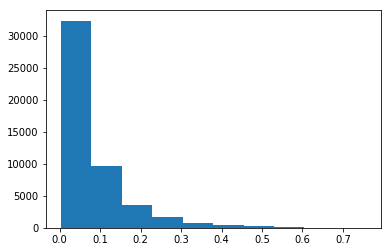

In [41]:
plt.hist( preds)
plt.show()

In [35]:
pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': preds }).to_csv('../data/pred_gbm_new.csv', index=False)

In [139]:

best_trees

[247, 341, 449, 402, 420]

In [38]:
x_train , x_val , y_train , y_val = train_test_split( features_train_t , labels_train , test_size = 0.3 , random_state=42)

In [39]:
dtrain = lgb.Dataset( x_train, y_train)
dvalid = lgb.Dataset( x_val , y_val, reference=dtrain)
bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid , verbose_eval=100,early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.241855	valid_0's auc: 0.771357
[200]	valid_0's binary_logloss: 0.239994	valid_0's auc: 0.776297
[300]	valid_0's binary_logloss: 0.239935	valid_0's auc: 0.776268
Early stopping, best iteration is:
[244]	valid_0's binary_logloss: 0.239797	valid_0's auc: 0.776757


Plot feature importances...


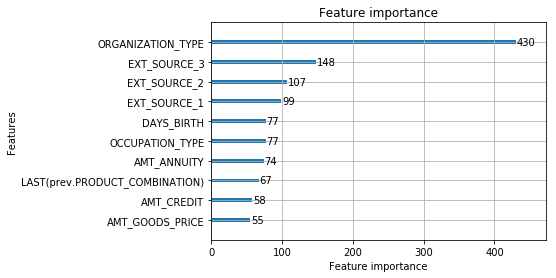

In [40]:
print('Plot feature importances...')
ax = lgb.plot_importance( bst , max_num_features=10)
plt.show()